In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_excel('RE_Data.xlsx')

In [4]:
df = df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1)

In [5]:
# Shuffle the DataFrame
df_shuff = df[0:50_000]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
var_columns = [c for c in df_shuff if c not in ['ph','ph_labels']]

X = df_shuff.loc[:,var_columns].values
y = df_shuff.loc[:,'ph'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [9]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
# Create the model
model = DecisionTreeRegressor(min_samples_split= 3, min_samples_leaf= 1, max_depth= 20, criterion= 'absolute_error')
# {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'absolute_error'}
model.fit(X_train, y_train)

# Predict on training and validation sets
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_valid = mean_squared_error(y_test, y_pred_valid)
rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)
r2_train = r2_score(y_train, y_pred_train)
r2_valid = r2_score(y_test, y_pred_valid)

# Print the evaluation metrics and best hyperparameters
print("DecisionTreeRegressor_train R^2 score: {:.3f}".format(r2_train))
print("DecisionTreeRegressor_valid R^2 score: {:.3f}".format(r2_valid))
print("DecisionTreeRegressor_train RMSE score: {:.3f}".format(rmse_train))
print("DecisionTreeRegressor_valid RMSE score: {:.3f}".format(rmse_valid))


DecisionTreeRegressor_train R^2 score: 0.996
DecisionTreeRegressor_valid R^2 score: 0.993
DecisionTreeRegressor_train RMSE score: 0.017
DecisionTreeRegressor_valid RMSE score: 0.025


In [10]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=20,
                      min_samples_split=3)

In [11]:
# Make predictions on the training and testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

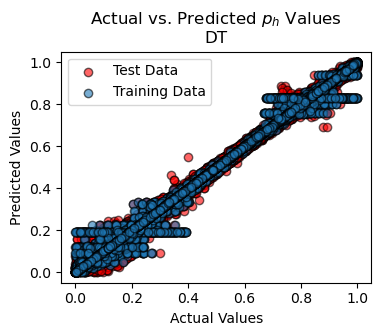

In [12]:
plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred_test, color='r', edgecolors='k', alpha=0.6, label='Test Data')
plt.scatter(y_train, y_pred_train, edgecolors='k', alpha=0.6, label='Training Data')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted $p_h$ Values\nDT')
plt.legend()
plt.show()


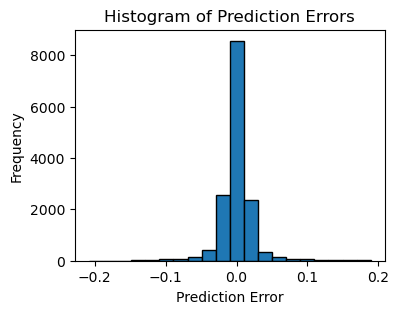

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
plt.hist(y_pred_test - y_test, bins=20, edgecolor='k')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()


In [17]:
from sklearn.inspection import permutation_importance

# Assuming you have trained a model named 'model' and have X_test and y_test as your test data
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

importances = result.importances_mean

In [11]:
importances

array([0.13814   , 0.65911333, 0.59733333, 0.0128    ])

In [12]:
#array([0.13357333, 0.29557333, 0.26742667, 0.        ])

In [13]:
datasize_tr = np.array([700,6500,7000,10500,14000,17500,21000,24500,28000,31500,35000])
datasize_vl = np.array([300,1500,3000,4500,6000,7500,9000,10500,12000,13500,15000])